## Discrete Random Variables

See: http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook9_discrete_random_variables/py_exploratory_comp_9_sol.ipynb
 

In [ ]:
## The ranint() and seed() Functions

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

print(rnd.randint(0, 1 + 1, 10)) # (low, high, size)

print(rnd.randint(0, 1 + 1, 10))

rnd.seed(10)
print(rnd.randint(0, 1 + 1, 10))

rnd.seed(10)
print(rnd.randint(0, 1 + 1, 10))

[0 1 1 0 0 1 0 0 0 0]
[0 1 0 0 1 1 0 0 1 0]
[1 1 0 1 0 1 1 0 1 1]
[1 1 0 1 0 1 1 0 1 1]


## Flipping a coin

In [6]:
# Flipping a coin

import numpy as np
import numpy.random as rnd

flip = rnd.randint(0, 1 + 1, 100)
headcount = 0
tailcount = 0
for i in range(100):
    if flip[i] == 0:
        headcount += 1
    else:
        tailcount += 1
print('number of heads:', headcount)
print('number of tails:', tailcount)

headcount = np.count_nonzero(flip == 0)
tailcount = np.count_nonzero(flip == 1)
print('headcount', headcount)
print('tailcount', tailcount)

outcomes = np.zeros(2, dtype='int') # Two outcomes. heads are stored in outcome[0], tails in outcome[1]
for i in range (2):
    outcomes[i] = np.count_nonzero(flip == i)
    print('outcome ', i, ' is ', outcomes[i])

number of heads: 50
number of tails: 50
headcount 50
tailcount 50
outcome  0  is  50
outcome  1  is  50


## Throwing a dice

In [7]:
## Throwing a dice

import numpy as np
import numpy.random as rnd

rnd.seed(33)
dicethrow = rnd.randint(1, 6 + 1, 100)
side = np.zeros(6, dtype='int')
for i in range(6):
    side[i] = np.count_nonzero(dicethrow == i + 1)
    print('number of times', i + 1, 'is', side[i])
print('total number of throws ', sum(side))

number of times 1 is 17
number of times 2 is 17
number of times 3 is 15
number of times 4 is 24
number of times 5 is 19
number of times 6 is 8
total number of throws  100


## Flipping a coin twice

In [9]:
import numpy as np
import numpy.random as rnd

rnd.seed(55)
flips = rnd.randint(low=0, high=1 + 1, size=(2, 100))
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)
print('number of 0, 1, 2 tails:', number_of_tails)

rnd.seed(55)
flips1 = rnd.randint(low=0, high=1 + 1, size=5)
rnd.seed(55)
flips2 = rnd.choice(range(2), size=5, replace=True)
np.alltrue(flips1 == flips2)  # Check whether all values in the two arrays are equal

number of 0, 1, 2 tails: [27 47 26]


True

## Bar graph

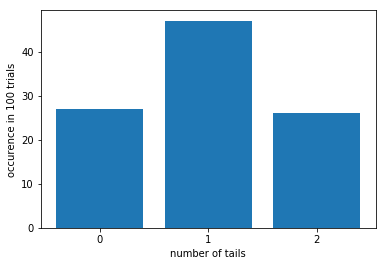

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

number_of_tails = np.zeros(3, dtype='int')
for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)

plt.bar(range(0, 3), number_of_tails)
plt.xticks(range(0, 3))
plt.xlabel('number of tails')
plt.ylabel('occurence in 100 trials');

## Cumulative Probability

cum_prob  [ 0.27  0.74  1.  ]


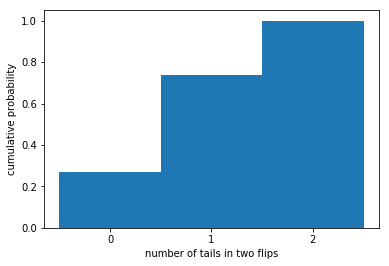

In [18]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

prob = number_of_tails / 100  # number_of_tails was computed two code cells back
cum_prob = np.cumsum(prob) # So cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
print('cum_prob ', cum_prob)

plt.bar(range(0, 3), cum_prob, width=1)
plt.xticks(range(0, 3))
plt.xlabel('number of tails in two flips')
plt.ylabel('cumulative probability');

## Flip a coin five times

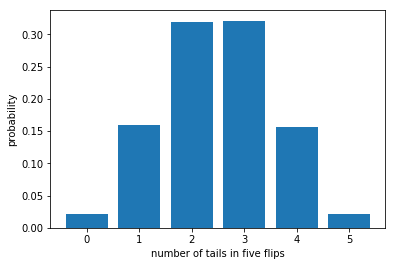

In [20]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

N = 1000
tails = np.sum(rnd.randint(0, 1 + 1, (5, 1000)), axis=0)
counttails = np.zeros(6, dtype='int')
for i in range(6):
    counttails[i] = np.count_nonzero(tails == i)
plt.bar(range(0, 6), counttails / N)
plt.xlabel('number of tails in five flips')
plt.ylabel('probability');

## Flip a coin 5 times revisited

In [24]:
from scipy.special import comb
print('Theoretical probabilities:')
for k in range(6):
    print(k, ' tails ', comb(5, k) * 0.5 ** k * 0.5 ** (5 - k))
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis=0)
    counttails = np.zeros(6)
    for i in range(6):
        counttails[i] = np.count_nonzero(tails==i)
    print('Probability with', N, 'trials: ', counttails / float(N))

Theoretical probabilities:
0  tails  0.03125
1  tails  0.15625
2  tails  0.3125
3  tails  0.3125
4  tails  0.15625
5  tails  0.03125
Probability with 1000 trials:  [ 0.033  0.151  0.307  0.321  0.156  0.032]
Probability with 10000 trials:  [ 0.0311  0.1552  0.3094  0.317   0.1547  0.0326]
Probability with 100000 trials:  [ 0.03147  0.15411  0.31099  0.31445  0.15853  0.03045]


## Maximum value of two dice throws

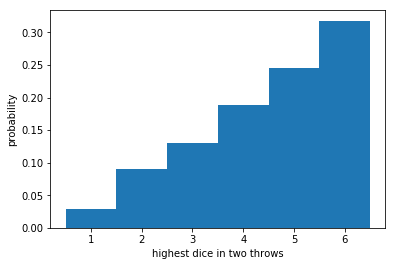

In [26]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

dice = rnd.randint(1, 6 + 1, (2, 1000))
highest_dice = np.max(dice, 0)
outcome = np.zeros(6)
for i in range(6):
    outcome[i] = np.sum(highest_dice == i + 1) / 1000
plt.bar(x=np.arange(1, 7), height=outcome, width=1)
plt.xlabel('highest dice in two throws')
plt.ylabel('probability');

## Maximum value of two dice throws revisited

In [27]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

for N in [100, 1000, 10000]:
    dice = rnd.randint(1, 6 + 1, (2, N))
    highest_dice = np.max(dice, axis=0)
    outcome = np.zeros(6)
    for i in range(6):
        outcome[i] = np.sum(highest_dice == i + 1) / N
    print('Outcome for', N, 'throws: ', outcome)
# Exact values
exact = np.zeros(6)
for i, j in enumerate(range(1, 12, 2)):
    exact[i] = j / 36
print('Exact probabilities: ',exact)

Outcome for 100 throws:  [ 0.04  0.05  0.16  0.19  0.24  0.32]
Outcome for 1000 throws:  [ 0.032  0.082  0.139  0.2    0.229  0.318]
Outcome for 10000 throws:  [ 0.0265  0.0846  0.1354  0.1945  0.2542  0.3048]
Exact probabilities:  [ 0.02777778  0.08333333  0.13888889  0.19444444  0.25        0.30555556]


## Election poll

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

rnd.seed(2)
people = np.zeros(1000000, dtype='int')  # candidate A is 0
people[490000:] = 1  # candidate B is 1
pole = rnd.choice(people, 1000)
poled_for_A = np.count_nonzero(pole == 0)
print('poled for A:', poled_for_A)
if poled_for_A > 500: 
    print('The Dog will predict the wrong winner')
else:
    print('The Dog will predict the correct winner')
    
Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 1000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 1000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 1000)

Awins = 0
Bwins = 0
for i in range(1000):
    people = np.zeros(1000000, dtype='int')  # candidate A is 0
    people[490000:] = 1  # candidate B is 1
    pole = rnd.choice(people, 5000)
    poled_for_A = np.count_nonzero(pole == 0)
    if poled_for_A > 2500: 
        Awins += 1
    else:
        Bwins += 1
print('1000 poles of 5000 people')
print('Probability that The Dog predicts candidate A to win:', Awins / 5000)

poled for A: 508
The Dog will predict the wrong winner
1000 poles of 1000 people
Probability that The Dog predicts candidate A to win: 0.267
1000 poles of 5000 people
Probability that The Dog predicts candidate A to win: 0.014
